In [1]:
import spacy
from spacy.cli import download
import networkx as nx
from tqdm import tqdm

# Load the spaCy model
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Initialize an empty graph
kg = nx.DiGraph()

# Load the corpus
with open('../data/corpus.txt', 'r', encoding='utf-8') as f:
    documents = f.readlines()

# Process each document
for doc_text in tqdm(documents):
    doc = nlp(doc_text)
    # Extract named entities
    entities = [ent.text for ent in doc.ents]
    # Add entities as nodes
    for ent in entities:
        kg.add_node(ent)
    # Extract relationships (for simplicity, using noun chunks)
    for chunk in doc.noun_chunks:
        if len(chunk.ents) >= 2:
            ent1, ent2 = chunk.ents[0].text, chunk.ents[1].text
            kg.add_edge(ent1, ent2, label="related_to")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 37.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


100%|██████████| 63/63 [00:06<00:00, 10.31it/s]


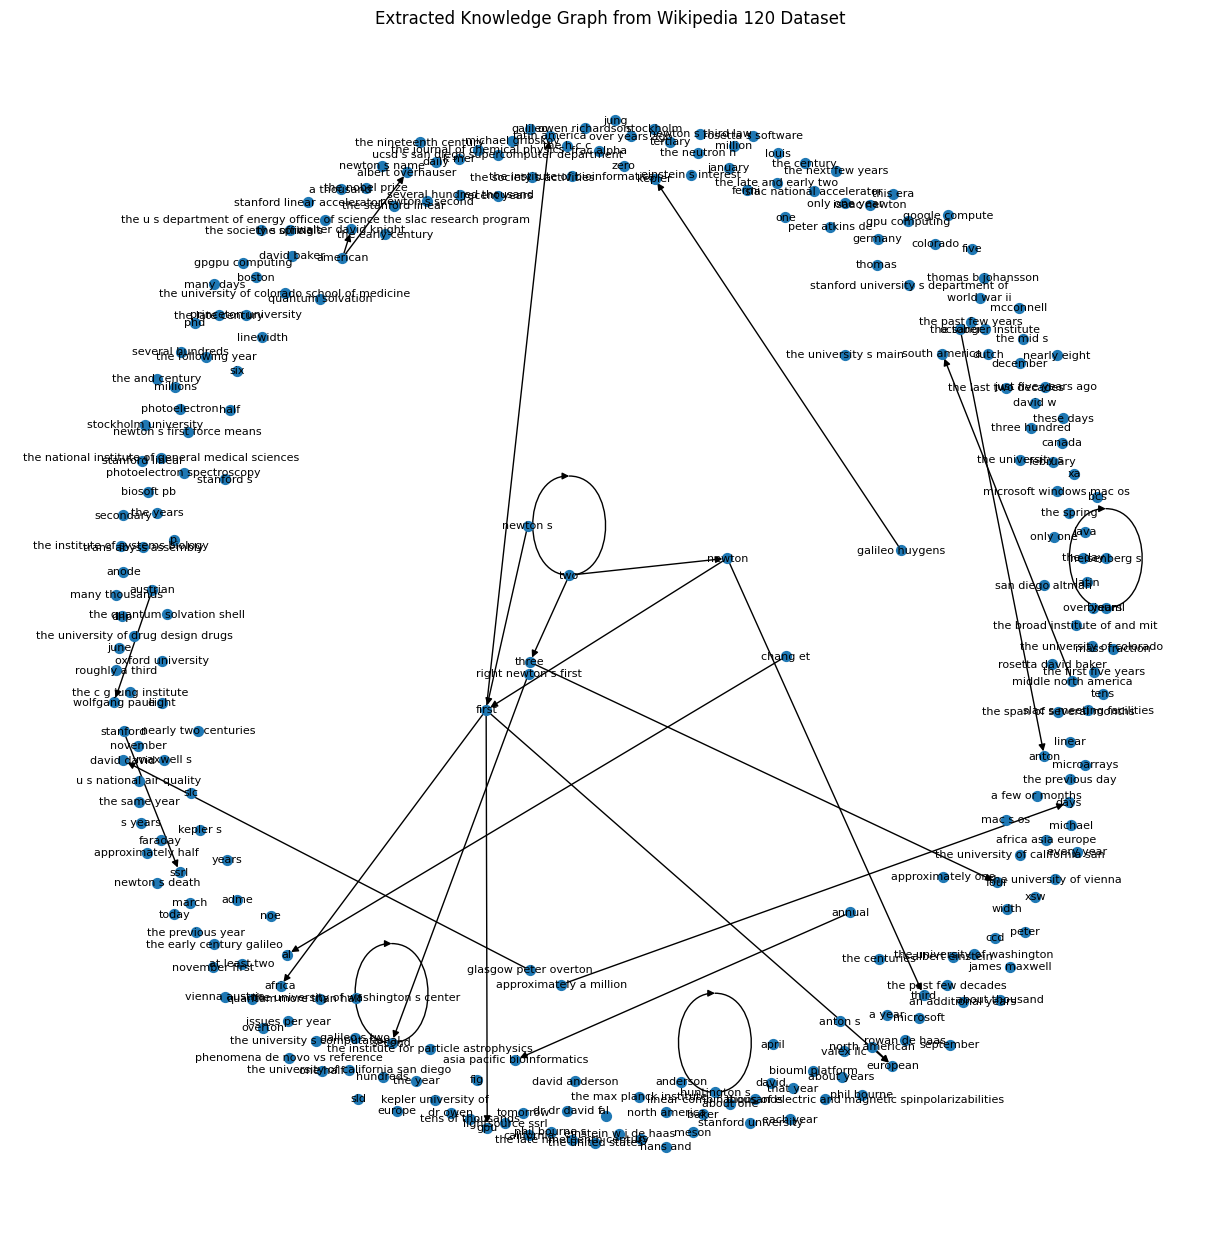

In [2]:
import matplotlib.pyplot as plt

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(kg, k=0.5)
nx.draw(kg, pos, with_labels=True, node_size=50, font_size=8)
plt.title("Extracted Knowledge Graph from Wikipedia 120 Dataset")
plt.show()
